# Preparing Training Data (FasterRCNN)

#### Steps to create training data from annotated bounding boxes & Images of custom data

Mainly, there are three folders which needs to be updated before data is used for training.

These are:

1. Annotations
2. ImageSets
3. Images

Annotation folder would contain specific annotations of the classes for each image used for training. It would be a text file, represented by the name of the image.

ImageSets would contain, train & test text files, which would contain the names of the images without extention used for training and testing.

Images folder contains all images used for training & testing.

In [60]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Loading the annotations

df_anno = pd.read_csv('../icdar.csv')

In [3]:
# Renaming the columns as the original labels aren't correct
df_anno.columns = ['name','xmin','ymin','w','h','label']

In [4]:
df_anno.head()

,name,xmin,ymin,w,h,label
0,eu-001-1.jpg,189,628,854,214,1
1,eu-001-1.jpg,192,902,840,361,1
2,eu-001-1.jpg,189,1336,845,268,1
3,eu-001-2.jpg,194,197,851,572,1
4,eu-001-2.jpg,211,829,831,533,1


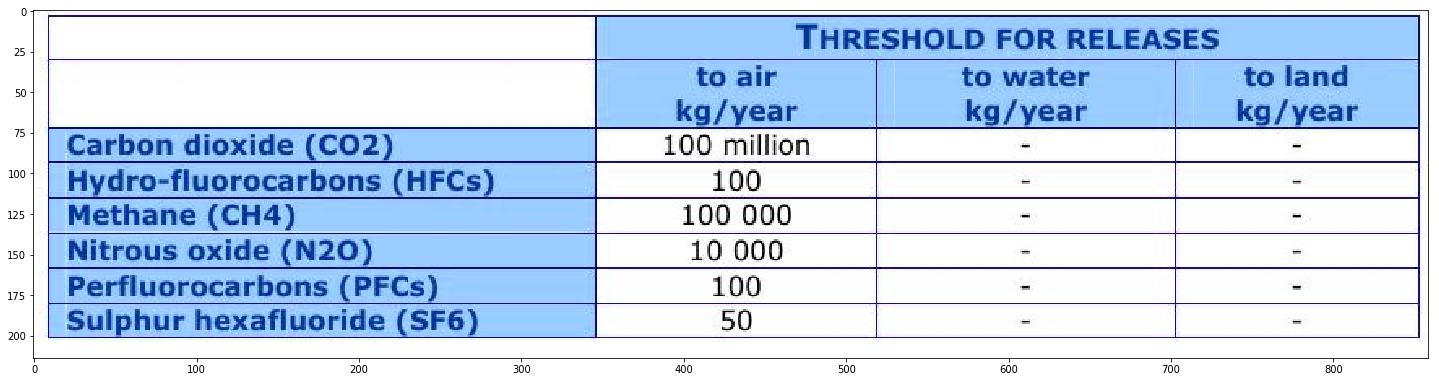

In [5]:
# Load a single image to test if annotation is right

im = cv2.imread('data/TABLES/data/MISC/icdar/eu-001-1.jpg')
plt.figure(figsize = (25,25))
plt.imshow(im[628:628+214,189:189+854+5])

### Prelimnary analysis  (Can be skipped)

##### It is found out that the border lines of tables are tightly packed a buffer of 5 pixels in all directions can be beneficial

In [6]:
df_anno['xmin']=df_anno['xmin'].apply(lambda x:x-5)
df_anno['ymin']=df_anno['ymin'].apply(lambda x:x-5)
df_anno['w']=df_anno['w'].apply(lambda x:x+5)
df_anno['h']=df_anno['h'].apply(lambda x:x+5)

In [34]:
df_anno.shape

(129, 6)

# Create annotations

In [46]:
# Define training Labels; here 1 being table class is defined

training_labels = [1]
PATH_OF_FOLDER='data/TABLES/data/'

In [57]:
### Points to ponder before making annotaions ###

# This cell creates the annotation txt files in the Annotation folder and train.txt in ImageSets folder
# Before running this cell remember to delete the old files from the Annottation folder and the ImageSets folder



#the complete file of the annotation data used in training ; doesn't have much significance while training
def create_annotations(PATH_OF_FOLDER,df_anno,training_labels,type_of_anno='train'):
    f=open(PATH_OF_FOLDER+'/'+type_of_anno+'_anno.txt','w') 


    for i in df_anno.iterrows():

        name   = i[1]['name'].split('.')[0]
        xmin   = i[1]['xmin']
        ymin   = i[1]['ymin']
        width  = i[1]['w']
        height = i[1]['h']
        xmax   = xmin + width
        ymax   = ymin + height
        label = i[1]['label']

        # All annotations for these files are going to be stored there
        path=os.path.join(PATH_OF_FOLDER,'Annotations', name + '.txt')
    #     print(path)
        if label in training_labels:
            data=str(xmin)+';'+str(ymin)+';'+str(xmax)+';'+str(ymax)+';'+str(label)+'\n'

            with open(path,'a') as f1:
                f1.write(data)  #write the annotation in the Annotation folder file
                f.write(name+';'+data) #write the annotation in the complete list of training files
                f1.close()
        else:
            print (label)
    f.close()

def create_imagesets(PATH_OF_FOLDER,df_train,type_of_anno='train'):
    train_list=open(os.path.join(PATH_OF_FOLDER,'ImageSets/'+type_of_anno+'.txt'),'a')
    train_files=np.unique(df_train['name'])

    for t in train_files:
         train_list.write(t.split('.')[0]+'\n') #creates the list of files used for final training updated in ImageSets/train

    train_list.close()

### Create Annotations for test & train

In [61]:
# Train & test split

X_train, X_test, y_train, y_test = train_test_split(df_anno,df_anno['label'], test_size=0.2, random_state=42)

In [64]:
# Creating training annotations
create_annotations(PATH_OF_FOLDER,X_train,training_labels,type_of_anno='train')

In [63]:
# Creating test annotations?
create_annotations(PATH_OF_FOLDER,X_test,training_labels,type_of_anno='test')

### Create ImageSets ; Most important part 

In [65]:
# train
create_imagesets(PATH_OF_FOLDER,X_train,type_of_anno='train')
# test
create_imagesets(PATH_OF_FOLDER,X_test,type_of_anno='test')